# Assignment 5 - Neural Networks


#### Roll Number: 23100174

### Task Explanation

In this assignment, we will see how changes in the neural network architecture and the hyperparameters can have an effect on how the network performs 

Wheat rust is a devastating plant disease that affects many crops, reducing yields and affecting the livelihoods of farmers and decreasing food security across the continent. The disease is difficult to monitor at a large scale, making it difficult to control and eradicate.

The objective of this challenge is to see how small changes in the model architecture and the hyperparameters can have an effect on the final results. You are required to add screenshots of the results (the accuracy, history and loss graphs and the confusion matrix) with the changes you made in the architecture and the hyperparameters in a pdf file, and submit it along with the code.

ALL THE CODE HAS ALREADY BEEN WRITTEN FOR YOU. YOU ARE ONLY REQUIRED TO MAKE CHANGES IN THE CODE WHERE IT IS ASKED OF YOU

### Let's Start

Make necessary imports here e.g. import cv2, import glob, etc

In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, LeakyReLU, Flatten, Dropout, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import keras
import random
from keras.datasets import mnist
# any other imports that you may require

### Hyperparameters

CHANGE THESE ONLY WHEN YOU ARE ASKED TO LATER ON IN THE ASSIGNMENT

In [ ]:
batch_size = 32
epochs = 30
learning_rate = 0.0001
input_shape = (256,256,3)

### Data

MAKE NO CHANGES IN THIS PART

In [ ]:
!git clone https://github.com/MMFa666/WheatDiseaseDataset.git

Cloning into 'WheatDiseaseDataset'...
remote: Enumerating objects: 749, done.
remote: Total 749 (delta 0), reused 0 (delta 0), pack-reused 749
Receiving objects: 100% (749/749), 386.05 MiB | 26.92 MiB/s, done.
Checking out files: 100% (877/877), done.


In [ ]:
healthy_wheat = '/content/WheatDiseaseDataset/train/healthy_wheat'
leaf_rust = '/content/WheatDiseaseDataset/train/leaf_rust'
stem_rust = '/content/WheatDiseaseDataset/train/stem_rust'
healthy_wheat_files = glob.glob(healthy_wheat + '/*.jpg')
leaf_rust_files = glob.glob(leaf_rust + '/*.jpg')
stem_rust_files = glob.glob(stem_rust + '/*.jpg')
print(len(healthy_wheat_files))
print(len(leaf_rust_files))
print(len(stem_rust_files))

113
286
300


In [ ]:
train_dir = '/content/WheatDiseaseDataset/train'
train_files = glob.glob(train_dir + '/*/*.jpg')
len(train_files)

699

In [ ]:
x = train_files[0].split('/')
x[4]

'leaf_rust'

In [ ]:
test_dir = '/content/WheatDiseaseDataset/test'
test_files = glob.glob(test_dir + '/*/*.jpg')
len(test_files)

177

### Labels

MAKE NO CHANGES IN THIS PART

In [ ]:
labels={}
labels['healthy_wheat'] = 0
labels['leaf_rust'] = 1
labels['stem_rust'] = 2

### Preprocessing

MAKE NO CHANGES IN THIS PART

In [ ]:
def preprocessing_norm(images):
    return images/255.0

### Batch Generator

MAKE NO CHANGES IN THIS PART

In [ ]:
def parse_path(filename):
  one_hot = [0,0,0]
  x = filename.split('/')
  lab = x[4]
  label = labels[lab]
  one_hot[label] = one_hot[label] + 1
  return one_hot

def get_image(filename):
  img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
  image = cv2.resize(img, (256,256))
  return image

def data_generator(data, batch_size):
  total_size = len(data)
  indexes = np.arange(0, total_size, batch_size)
  if total_size % batch_size != 0:
    indexes = indexes[:-1]  
  while True:
    np.random.shuffle(indexes)
    for index in indexes:
      batch_paths = data[index:index+batch_size]
      batch_x = np.array([get_image(path) for path in batch_paths])
      batch_y = np.array([parse_path(path) for path in batch_paths])
      #batch_x = preprocessing_norm(batch_x)
      yield batch_x, batch_y

Initialize train data generator

In [ ]:
data = data_generator(train_files, batch_size)

### Training

THE BASE MODEL HAS ALREADY BEEN BUILT FOR YOU. INITIALIZE AND COMPILE THIS MODEL AND SAVE THE SCREENSHOTS OF THE RESULTS IN THE PDF. 

YOU WILL BE MAKING THE CHANGES TO THE ARCHITECTURE IN THIS CELL (SPECIFIED LATER IN THE ASSIGNMENT)

In [ ]:
input_img = Input(shape=(input_shape))
l = Conv2D(256, kernel_size=(5,5),strides=(2,2))(input_img)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Conv2D(128, kernel_size=(3,3),strides=(2,2))(l)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Conv2D(64, kernel_size=(3,3),strides=(2,2))(l)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Conv2D(64, kernel_size=(3,3),strides=(2,2))(l) 
l = BatchNormalization()(l) 
l = LeakyReLU()(l) 
l = Dropout(0.2)(l) 
l = Conv2D(32, kernel_size=(3,3),strides=(2,2))(l)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Conv2D(16, kernel_size=(3,3),strides=(2,2))(l)
l = BatchNormalization()(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Flatten()(l)
l = Dense(128)(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
l = Dense(32)(l)
l = LeakyReLU()(l)
l = Dropout(0.2)(l)
output_class = Dense(3, activation='softmax')(l)

model_initial = Model(inputs=input_img, outputs=output_class)

In [ ]:
#print model summary here
model_initial.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 256)     19456     
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 256)    1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 126, 126, 256)     0         
                                                                 
 dropout (Dropout)           (None, 126, 126, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 128)       295040    
                                                             

In [ ]:
adam = Adam(lr = learning_rate)
model_initial.compile(loss='categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist = model_initial.fit(data, batch_size = batch_size, epochs=epochs, steps_per_epoch=21)

Epoch 1/30
21/21 [==============================] - 60s 2s/step - loss: 1.2184 - accuracy: 0.3735
Epoch 2/30
21/21 [==============================] - 52s 2s/step - loss: 1.1481 - accuracy: 0.3810
Epoch 3/30
21/21 [==============================] - 53s 3s/step - loss: 1.1067 - accuracy: 0.4196
Epoch 4/30
21/21 [==============================] - 52s 2s/step - loss: 1.1060 - accuracy: 0.4182
Epoch 5/30
21/21 [==============================] - 51s 2s/step - loss: 1.1082 - accuracy: 0.4018
Epoch 6/30
21/21 [==============================] - 51s 2s/step - loss: 1.0678 - accuracy: 0.4449
Epoch 7/30
21/21 [==============================] - 51s 2s/step - loss: 1.0417 - accuracy: 0.4792
Epoch 8/30
21/21 [==============================] - 51s 2s/step - loss: 1.0478 - accuracy: 0.4435
Epoch 9/30
21/21 [==============================] - 51s 2s/step - loss: 1.0408 - accuracy: 0.4747
Epoch 10/30
21/21 [==============================] - 51s 2s/step - loss: 0.9996 - accuracy: 0.4851
Epoch 11/30
21/21 [

Plot the loss and accuracy graphs of training. 

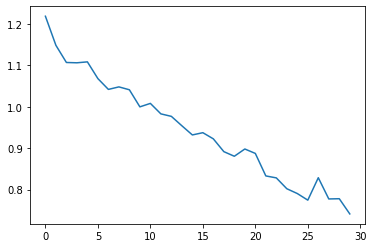

In [ ]:
# Loss Plot
plt.plot(hist.history['loss'])

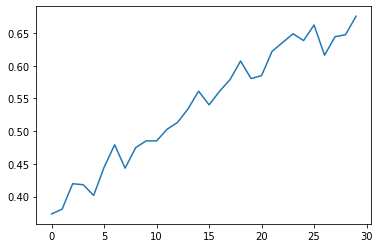

In [ ]:
# Accuracy Plot
plt.plot(hist.history['accuracy'])

### Evaluation

Now, we will evaluate our model on the test data.

In [ ]:
test_data = data_generator(test_files, 177)

In [ ]:
predictions = model_initial.predict(next(test_data)[0])

In [ ]:
pred = []
truth = []
for prediction in predictions:
  pred.append(np.argmax(prediction))
for true in next(test_data)[1]:
  truth.append(np.argmax(true))

Calculate and print accuracy.

In [ ]:
true = 0
total = len(pred)
for i in range(total):
  if pred[i] == truth[i]:
    true = true + 1
print("Accuracy =", (true/total)*100)

Accuracy = 57.6271186440678


Calculate and print Confusion Matrix. 

In [ ]:
matrix = confusion_matrix(truth, pred)

In [ ]:
def plot_confusion_matrix(conf_mat):
    classes = list(labels.keys())
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.show()

Use the above function to plot confusion matrix here.

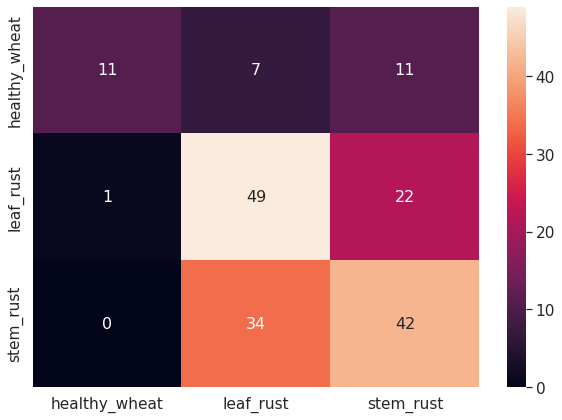

In [ ]:
plot_confusion_matrix(matrix)

### Changes to be made


Now that you've successfuly ran and gotten the results for the model that we built for you, make the following changes (one by one), and see how they effect the performance and the results of the model. In total, you will have the results of 5 different experiments (including those of the network already built for you)

SCREENSHOT ALL THE RESULTS (INCLUDING THOSE FOR THE MODEL WE BUILT FOR YOU) AND ADD THEM TO A PDF. 

Change #1: Change the learning rate to 0.01. <br>
Change #2: Change the epochs to 50 (make sure to change the learning rate back to 0.0001) <br>
Change #3: Change the Leaky ReLU activation to ReLU (make sure to use 30 epochs and a learning rate of 0.0001) <br>
Change #4: Increase the depth of the neural network by adding another convolutional layer (followed by the batch normalization layer, the leaky ReLU activation layer, and the dropout layer). This new piece of code will be added right before the convolution layer with the filter size of 32 in the architecture (line 14). The code to be added is as follows:     
```
l = Conv2D(64, kernel_size=(3,3),strides=(2,2))(l) 
l = BatchNormalization()(l) 
l = LeakyReLU()(l) 
l = Dropout(0.2)(l) 
```
Again, this is to be added in the 14th line, i.e, between the following two lines of code in the architecture:     
```
l = Dropout(0.2)(l)
l = Conv2D(32, kernel_size=(3,3),strides=(2,2))(l)
```
You will notice that this is the exact layer collection as the previous layer. Make sure to change all the ReLU layers back to Leaky ReLU and keep the epochs at 30 and the learning rate at 0.0001 for a controlled experiment


### Questions (You might need to do research)

1) How did changing the learning rate impact your results? Why? 


2) How did changing the number of epochs impact your results? Why? 


3) How did changing the leaky relu function to a normal relu function impact your results? Why?

4) How did adding a new layer group impact your results? Why?

4) The batch normalization and the dropout layers act like regularization layers. Theoretically, what would happen if all these regularization layers are removed?

5) What is class imbalance? Is there class imbalance in this problem? Why or why not?

## **ANSWER 1**
Learning rate is one of the hyper-parameters in a neural network that is used while the model is doing gradient descent. In each epoch, it is used to control how much the model should change the weights in response to the estimated error. Subsequently, learning rate can have a crucial effect on the model and its training. 

A very low learning rate may cause the model to take a very long time to converge or may even get stuck. While a very high learning rate may cause the model to rapidly converge to a suboptimal solution or even miss the global minimum.  

In context to this assignment when the learning rate was 0.0001, the test accuracy was 67.23% and training accuracy reached a maximum of 75% whereas after changing the learning rate to 0.01, the test accuracy went down to 54.24% and training accuracy increased and reached a maximum of 90%.  

It seems that when we increased the learning rate, the training accuracy increased because the model might have converged into a sub-optimal solution or overtrained. Hence, this is further corroborated by the fact that the model has a higher variance( i-e test accuracy decreased after increasing the learning rate) than the base model.  As a result, a higher learning rate will negatively impact our model's accuracy and instead of generalizing the model it will overtrain the model on training data and its noise.  

## ANSWER **2**
The number of epochs is also another hyper parameter of neural network that is used to control how many times the algorithm will work through the training data in order to learn it.  

In context to this assignment when the number of epochs were 30 in the base model, the test accuracy was 67.23% and training accuracy reached a maximum of approximately 75% whereas after changing the learning rate to 50, the test accuracy went down to 61.58% and training accuracy increased and reached a maximum of around 90%.  

It seems that a higher number of epochs is negatively affecting the accuracy of our model. It is possible that at the higher number of epochs, the model is learning the noise of training data and is therefore overfitting and instead of stopping at an optimum solution the model is missing it. This is also evident from the fact that training accuracy is increasing but the test accuracy is decreasing at higher epochs. Hence, this shows that the model has a higher variance and may not perform well on unseen data at higher epochs. 

## ANSWER **3**
Both LeakyRelu and Relu are activation functions used in neural networks. LeakyRelu was designed and introduced in order to overcome the shortcomings of simple Relu function. The problem with Relu(aka Dying Relu) is that since it is defined as y(x) = max (0, x), therefore, the gradient of Relu gives 1 if value is positive and 0 if the value is negative. As a result, a neuron will become dead if the value is negative and will always output 0. Due to this the accumulated gradient for weight update will be multiplied by 0 and therefore, the layers below this dead neuron will contribute nothing to the learning and will become useless including the dead neuron.  So, this is solved by LeakyRelu because it gives a very small value like 0.01 at negative values so at least some learning can happen.  

In context to this assignment when in the base model LeakyRelu was used, the test accuracy was 67.23% and training accuracy reached a maximum of approximately 75% whereas after changing LeakyRelu to Relu, the test accuracy went down to 52.54% and training accuracy also decreased and reached a maximum of around 54%.  

It is apparent that changing LeakyRelu to Relu is negatively impacting our model's performance on both training and testing data. Due to dead neuron problem of Relu it is highly probable that some neurons in the models are getting dead and contributing nothing in learning thus causing an unstable and incomplete training process due to which the model is performing badly which is also supported by the results as both the training and testing accuracies are decreasing after replacing LeakyRelu with Relu 

## **ANSWER 4**
The number of layers in a neural net is another hyper parameter for the architecture of the model. It is basically used to increase the complexity of the model so that the model can fit on data if the problem is complex, and if the model is under training. Hence, if the problem is already simple then increasing the number of layers will overtrain the model and decrease test accuracy while if the problem is complex and model is being underfit then increasing the number of layers will fit the model, thus improving model’s performance.  

In context to this assignment when the base model was used, the test accuracy was 67.23% and training accuracy reached a maximum of approximately 75% whereas after adding another layer group, the test accuracy went down to 57.63% and training accuracy also decreased and reached a maximum of around 68%. 

The fact that training accuracy is decreasing after adding another layer group indicates that model is not overfitting otherwise the training accuracy should have increased. It seems that the model is being underfitted because both test and training accuracies are decreasing. One reason for this could be that since we have increased the number of layers, we now have additional weights to train which now may require a greater number of epochs. However, since we don’t increase the epochs, the model ends up undertraining and performing bad on both training and testing data. As a result, in this case just adding another layer will negatively impact the performance of the model. 

## **ANSWER 5**
Normalization is a preprocessing technique in order to standardize the data. Similarly, batch normalization is the technique of normalization done between layers of a neural network in order to speed up the training process and enabling the use of higher learning rates by reducing the internal covariate shift of the network.  

On the other hand, dropout layer is a regularization technique that approximates the training of lots of neural networks with different architectures in parallel. In this technique, some of the neurons are randomly turned off by ignoring their output. As a result, this makes the model more generalized by putting randomness into the training process and thus decreases the chances of model being overfit.  

Theoretically, if we remove all these regularization layers, then the model will be more susceptible to overtraining and learning the noise of training data as well. Since there will be no randomness, there will be no ensemble and model will be less generalized so test accuracy will also go down. Secondly, without batch normalization, the training process will slow down because instead of higher learning rate we would need to use low learning rates which will take a greater number of epochs to train thus more time. Hence, removing these layers will negatively affect our model’s performance. 

## **ANSWER 6**
Class imbalance in dataset happens when the number of observations belonging to each class are different. I-e there are a greater number of observations belonging to one class as compared to another class.  

In this problem, as seen by the length of list of files for each class, there are 113 observations belonging to class healthy wheat, 286 belonging to class leaf rust and 300 belonging to class stem rust. So yes, there is a clear class imbalance in this problem because the number of observations belonging to healthy wheat class is almost half of that of other classes. As a result, the model will have difficulty learning to predict this minority class.  